In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##Đọc và chuẩn hóa dữ liệu

In [ ]:
# Đường dẫn tới file CSV
thermostat_path = '~\thermostat_sales.csv' #Enter your data here

In [ ]:
# Đọc dữ liệu
thermostat_sales_data = pd.read_csv(thermostat_path)
print(thermostat_sales_data.head())

   Thermostat_sales
0               260
1               245
2               185
3               169
4               162


In [ ]:
# Lấy cột giá trị
values = thermostat_sales_data.iloc[:, 0]
y = values.values.reshape(-1, 1)
N = len(y)
print("Data size:", N)

Data size: 52


In [ ]:
# Tạo chỉ số tuần làm đặc trưng (biến độc lập)
X = np.arange(N).reshape(-1, 1)

# Thêm cột bias (1) vào X
X_bias = np.hstack([np.ones((N, 1)), X])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape[0], "| Test size:", X_test.shape[0])


Train size: 41 | Test size: 11


##Trực quan dữ liệu

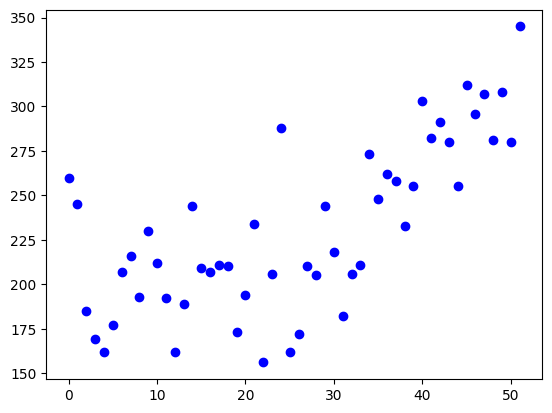

In [ ]:
plt.plot(values, 'bo ')
plt.show()

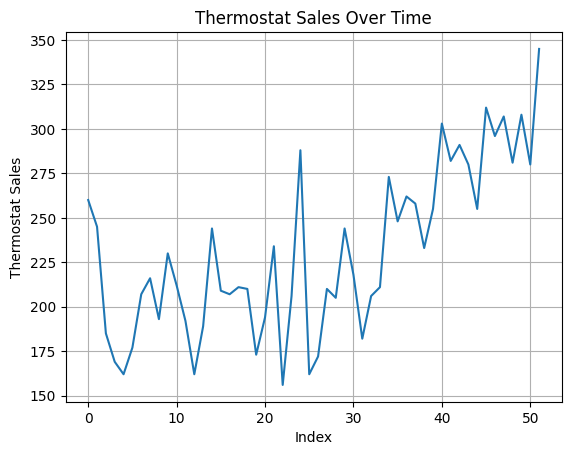

In [ ]:
plt.plot(thermostat_sales_data.index, thermostat_sales_data['Thermostat_sales'], linestyle='-')
plt.xlabel('Index')
plt.ylabel('Thermostat Sales')
plt.title('Thermostat Sales Over Time')
plt.grid(True)
plt.show()

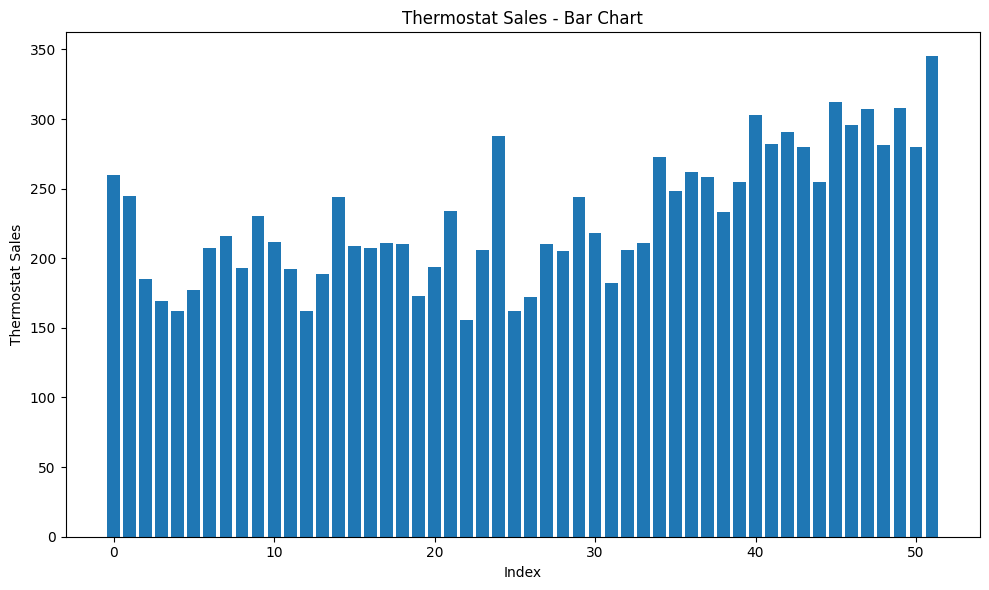

In [ ]:
categories = thermostat_sales_data.index
values = thermostat_sales_data['Thermostat_sales']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Thermostat Sales')
plt.title('Thermostat Sales - Bar Chart')

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

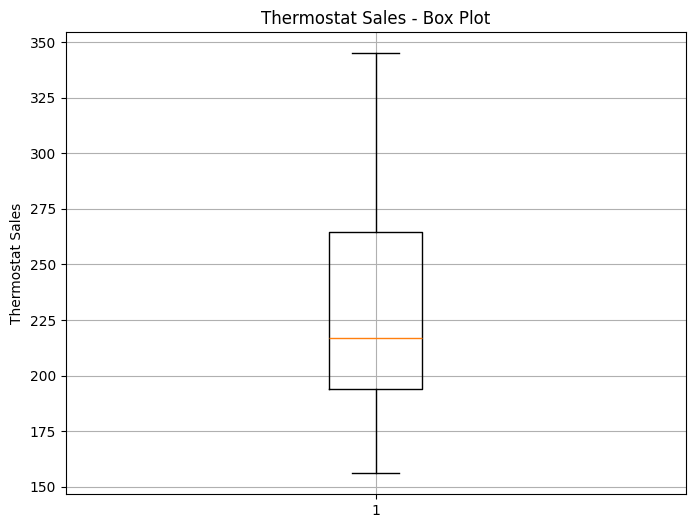

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(thermostat_sales_data['Thermostat_sales'])
plt.ylabel('Thermostat Sales')
plt.title('Thermostat Sales - Box Plot')
plt.grid(True)
plt.show()

#Xây dựng Linear Regression thủ công

In [ ]:
# 1. Hàm dự đoán
def predict(x, theta):
    return x @ theta

# 2. Hàm tính đạo hàm (gradient)
def compute_gradient(y_hat, y_true, x):
    return 2 * x.T @ (y_hat - y_true) / x.shape[0]

# 3. Cập nhật tham số
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# 4. Hàm tính lỗi MSE
def compute_loss(y_hat, y_true):
    return np.mean((y_hat - y_true) ** 2)


##Huấn luyện

In [ ]:
# Huấn luyện bằng Gradient Descent trên tập train
epoch_max = 100000
lr = 0.0001
theta = np.zeros((X_train.shape[1], 1))  # [w0, w1]
losses = []

for epoch in range(epoch_max):
    y_hat = predict(X_train, theta)
    loss = compute_loss(y_hat, y_train)
    gradient = compute_gradient(y_hat, y_train, X_train)
    theta = update_theta(theta, gradient, lr)
    losses.append(loss)

    if (epoch + 1) % 10000 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}, theta = {theta.ravel()}")


Epoch 10000: Loss = 4326.2022, theta = [71.63369659  5.27179094]
Epoch 20000: Loss = 2379.4340, theta = [115.29854046   3.97878529]
Epoch 30000: Loss = 1651.6549, theta = [141.99628594   3.18821026]
Epoch 40000: Loss = 1379.5822, theta = [158.31993561   2.70483349]
Epoch 50000: Loss = 1277.8706, theta = [168.30061126   2.4092852 ]
Epoch 60000: Loss = 1239.8468, theta = [174.40303863   2.2285798 ]
Epoch 70000: Loss = 1225.6320, theta = [178.13421086   2.11809213]
Epoch 80000: Loss = 1220.3180, theta = [180.41554014   2.05053729]
Epoch 90000: Loss = 1218.3314, theta = [181.81040023   2.00923262]
Epoch 100000: Loss = 1217.5887, theta = [182.66325155   1.98397794]


##Kết quả

In [ ]:
# Dự đoán trên tập test
pred1 = predict(X_test, theta)

# Các độ đo
MSE_1 = mean_squared_error(y_test, pred1)
RMSE_1 = np.sqrt(MSE_1)
R2_1 = r2_score(y_test, pred1)

print("Mean Squared Error (MSE) of the 1st model:\n", MSE_1)
print("Root Mean Squared Error (RMSE) of the 1st model:\n", RMSE_1)
print("R Square of the 1st model:\n", R2_1)


Mean Squared Error (MSE) of the 1st model:
 755.1065697722854
Root Mean Squared Error (RMSE) of the 1st model:
 27.479202495201445
R Square of the 1st model:
 0.7217430519663095


In [ ]:
#In kết quả
print(f"Phương trình hồi quy: y = {theta[0][0]:.2f} + {theta[1][0]:.2f} * x")


Phương trình hồi quy: y = 182.66 + 1.98 * x


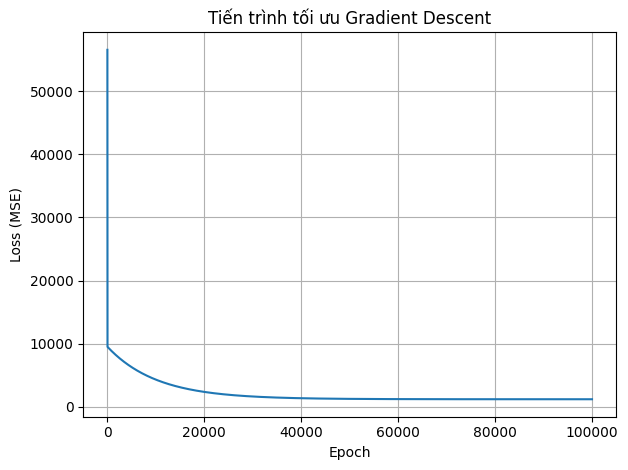

In [ ]:
# Biểu đồ Loss theo epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Tiến trình tối ưu Gradient Descent')
plt.grid(True)
plt.tight_layout()
plt.show()

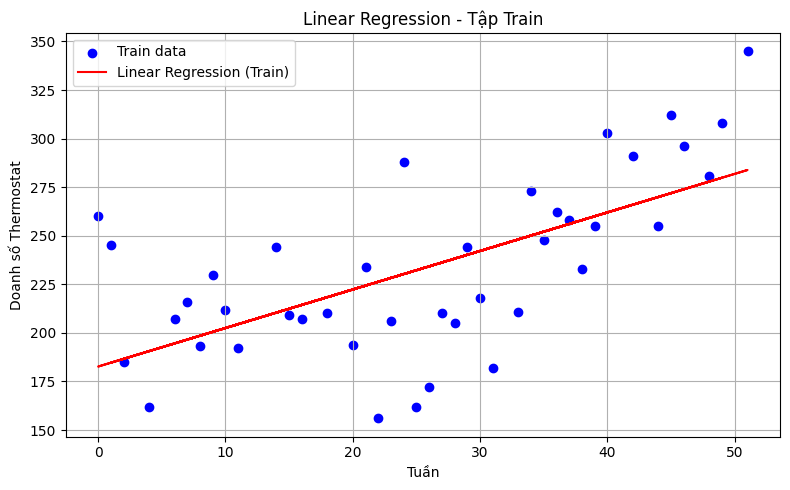

In [ ]:
# Dự đoán trên tập train để vẽ đường hồi quy cho tập train
y_train_pred = predict(X_train, theta)

plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.plot(X_train[:, 1], y_train_pred, color='red', label='Linear Regression (Train)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('Linear Regression - Tập Train')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


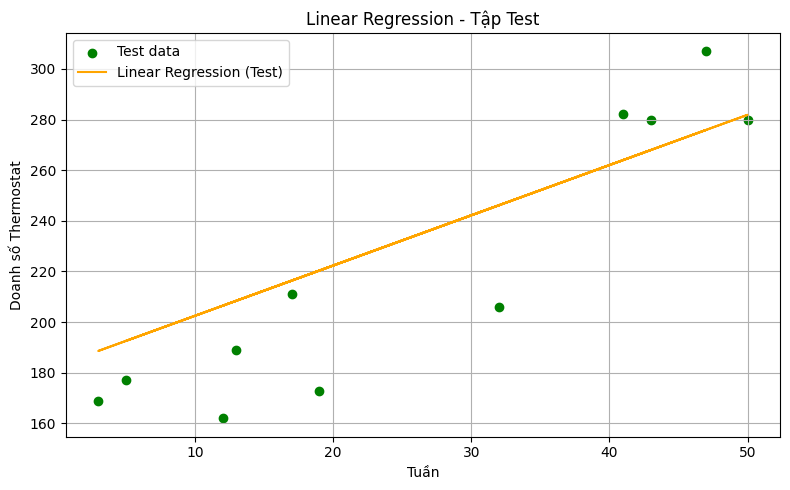

In [ ]:
# Dự đoán trên tập test để vẽ đường hồi quy trên test
y_test_pred = predict(X_test, theta)

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X_test[:, 1], y_test_pred, color='orange', label='Linear Regression (Test)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('Linear Regression - Tập Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


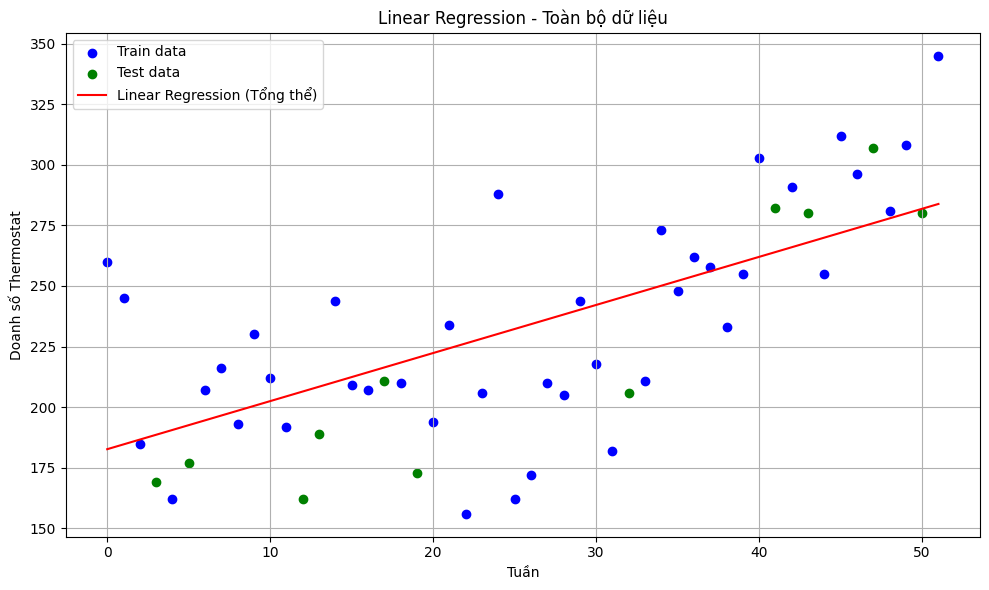

In [ ]:
# Dự đoán toàn bộ dữ liệu
y_pred_full = predict(X_bias, theta)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X[:, 0], y_pred_full, color='red', label='Linear Regression (Tổng thể)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('Linear Regression - Toàn bộ dữ liệu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Xây dựng LR từ thư viện

In [ ]:
model2 = LinearRegression()

model2.fit(X_train[:, 1].reshape(-1, 1), y_train)

# Dự đoán trên tập test bằng mô hình từ thư viện
y_pred_lib = model2.predict(X_test[:, 1].reshape(-1, 1))

# Tính toán các độ đo cho mô hình từ thư viện
MSE_2 = mean_squared_error(y_test, y_pred_lib)
RMSE_2 = np.sqrt(MSE_2)
R2_2 = r2_score(y_test, y_pred_lib)

print("\nMean Squared Error (MSE) of the 2nd model (Library):", MSE_2)
print("Root Mean Squared Error (RMSE) of the 2nd model (Library):", RMSE_2)
print("R Square of the 2nd model (Library):", R2_2)

# So sánh kết quả với mô hình tự xây dựng
print("\nComparison:")
print(f"MSE (Manual): {MSE_1:.4f} | MSE (Library): {MSE_2:.4f}")
print(f"RMSE (Manual): {RMSE_1:.4f} | RMSE (Library): {RMSE_2:.4f}")
print(f"R2 (Manual): {R2_1:.4f} | R2 (Library): {R2_2:.4f}")


Mean Squared Error (MSE) of the 2nd model (Library): 783.8765287256773
Root Mean Squared Error (RMSE) of the 2nd model (Library): 27.997795068999224
R Square of the 2nd model (Library): 0.7111413153454249

Comparison:
MSE (Manual): 755.1066 | MSE (Library): 783.8765
RMSE (Manual): 27.4792 | RMSE (Library): 27.9978
R2 (Manual): 0.7217 | R2 (Library): 0.7111


In [ ]:
# In các hệ số của mô hình từ thư viện
print(f"Phương trình hồi quy (Library): y = {model2.intercept_[0]:.2f} + {model2.coef_[0][0]:.2f} * x")


Phương trình hồi quy (Library): y = 184.01 + 1.94 * x


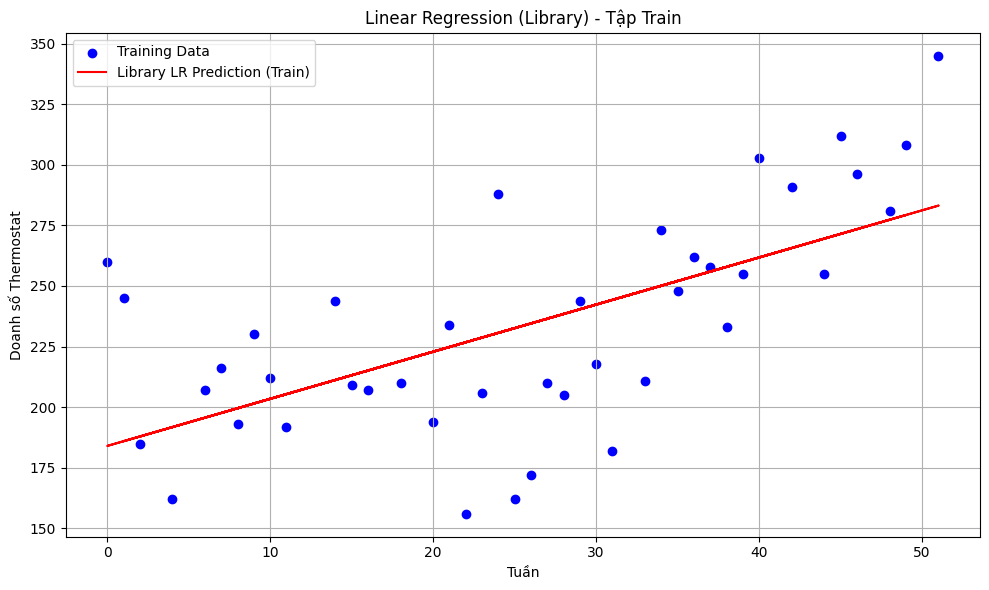

In [ ]:
import matplotlib.pyplot as plt
# Visualize the training result using the library model
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Training Data')
plt.plot(X_train[:, 1], model2.predict(X_train[:, 1].reshape(-1, 1)), color='red', label='Library LR Prediction (Train)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('Linear Regression (Library) - Tập Train')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

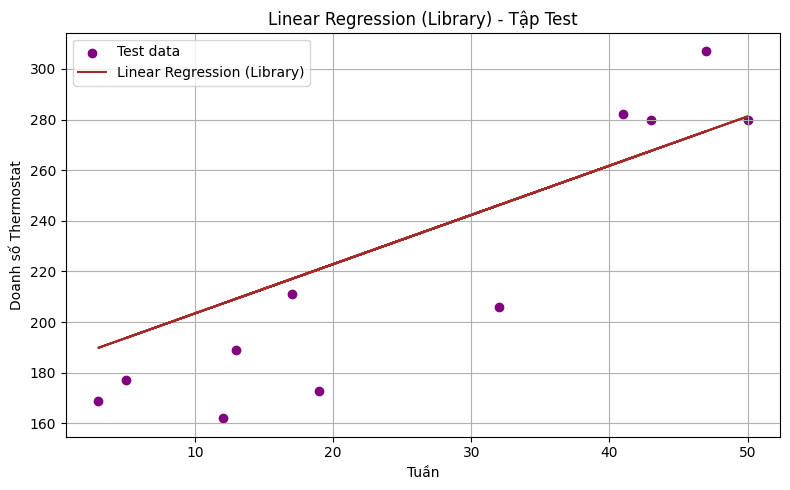

In [ ]:
# Biểu đồ kết quả của mô hình từ thư viện trên tập test
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], y_test, color='purple', label='Test data')
plt.plot(X_test[:, 1], y_pred_lib, color='brown', label='Linear Regression (Library)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('Linear Regression (Library) - Tập Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#So sánh kết quả trên LR và LR gọi từ thư viện

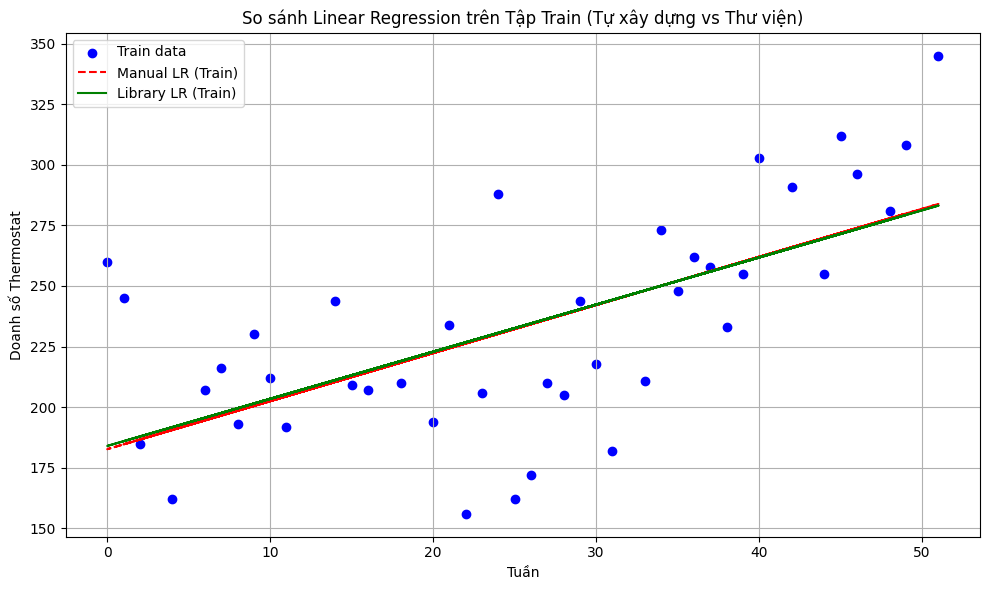

In [ ]:
# Dự đoán trên tập train bằng mô hình tự xây dựng
y_train_pred_manual = predict(X_train, theta)
# Dự đoán trên tập train bằng mô hình từ thư viện
y_train_pred_lib = model2.predict(X_train[:, 1].reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.plot(X_train[:, 1], y_train_pred_manual, color='red', linestyle='--', label='Manual LR (Train)')
plt.plot(X_train[:, 1], y_train_pred_lib, color='green', linestyle='-', label='Library LR (Train)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('So sánh Linear Regression trên Tập Train (Tự xây dựng vs Thư viện)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


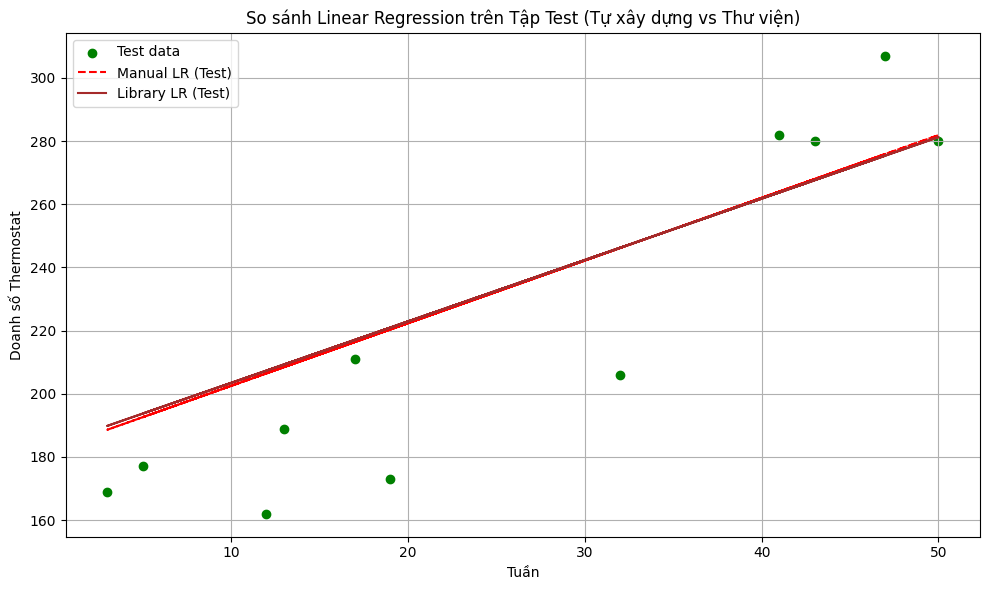

In [ ]:
# So sánh trực quan kết quả trên tập test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X_test[:, 1], y_test_pred, color='red', linestyle='--', label='Manual LR (Test)')
plt.plot(X_test[:, 1], y_pred_lib, color='brown', linestyle='-', label='Library LR (Test)')
plt.xlabel('Tuần')
plt.ylabel('Doanh số Thermostat')
plt.title('So sánh Linear Regression trên Tập Test (Tự xây dựng vs Thư viện)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Linear Regression:
- MSE (Manual) : 755.1066 | MSE (Library) : 783.8765
- RMSE (Manual): 27.4792  | RMSE (Library): 27.9978
- R2 (Manual)  : 0.7217   | R2 (Library)  : 0.7111

Đánh giá:
- Kết quả MSE, RMSE và R² giữa tính thủ công và thư viện đều rất gần nhau, cho thấy bạn đã thực hiện đúng quy trình.

- Mức chênh lệch nhỏ chủ yếu do chi tiết làm tròn hoặc cách thư viện tính toán.

- R² trên 0.7 chứng tỏ mô hình giải thích tốt dữ liệu (khoảng 71–72% phương sai).

- Sai số dự báo (RMSE ~27–28) là hợp lý nếu biến mục tiêu có giá trị trung bình lớn.

- Mô hình tuyến tính hoạt động ổn, phù hợp với bài toán thực tế.

- Nếu muốn cải thiện kết quả, có thể thêm biến đầu vào hoặc thử các phương pháp khác.

- Tổng thể: Kết quả tốt, quy trình đúng, có thể yên tâm sử dụng mô hình này.